# Deskripsi Dataset

- **Konteks**
Sebuah model respons dapat memberikan dorongan signifikan terhadap efisiensi kampanye pemasaran dengan meningkatkan respons atau mengurangi biaya. Tujuannya adalah untuk memprediksi siapa yang akan merespons tawaran untuk produk atau layanan.  
  
**Isi**  
- **AcceptedCmp1** - 1 jika pelanggan menerima tawaran dalam kampanye pertama, 0 jika tidak
- **AcceptedCmp2** - 1 jika pelanggan menerima tawaran dalam kampanye kedua, 0 jika tidak
- **AcceptedCmp3** - 1 jika pelanggan menerima tawaran dalam kampanye ketiga, 0 jika tidak
- **AcceptedCmp4** - 1 jika pelanggan menerima tawaran dalam kampanye keempat, 0 jika tidak
- **AcceptedCmp5** - 1 jika pelanggan menerima tawaran dalam kampanye kelima, 0 jika tidak
- **Response (target)** - 1 jika pelanggan menerima tawaran dalam kampanye terakhir, 0 jika tidak
- **Complain** - 1 jika pelanggan mengeluh dalam 2 tahun terakhir
- **DtCustomer** - tanggal pendaftaran pelanggan dengan perusahaan
- **Education** - tingkat pendidikan pelanggan
- **Marital** - status pernikahan pelanggan
- **Kidhome** - jumlah anak kecil dalam rumah tangga pelanggan
- **Teenhome** - jumlah remaja dalam rumah tangga pelanggan
- **Income** - pendapatan tahunan rumah tangga pelanggan
- **MntFishProducts** - jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir
- **MntMeatProducts** - jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir
- **MntFruits** - jumlah yang dihabiskan untuk produk buah dalam 2 tahun terakhir
- **MntSweetProducts** - jumlah yang dihabiskan untuk produk manis dalam 2 tahun terakhir
- **MntWines** - jumlah yang dihabiskan untuk produk anggur dalam 2 tahun terakhir
- **MntGoldProds** - jumlah yang dihabiskan untuk produk emas dalam 2 tahun terakhir
- **NumDealsPurchases** - jumlah pembelian yang dibuat dengan diskon
- **NumCatalogPurchases** - jumlah pembelian yang dibuat menggunakan katalog
- **NumStorePurchases** - jumlah pembelian yang dibuat langsung di toko
- **NumWebPurchases** - jumlah pembelian yang dibuat melalui situs web perusahaan
- **NumWebVisitsMonth** - jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir
- **Recency** - jumlah hari sejak pembelian terakhir  

**Inspirasi**
Tujuan utamanya adalah untuk melatih model prediktif yang memungkinkan perusahaan untuk memaksimalkan keuntungan dari kampanye pemasaran berikutnya.

In [34]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [35]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [37]:
df.shape

(2240, 30)

Hasil `df.shape` menunjukkan bahwa DataFrame `df` memiliki 2240 baris dan 30 kolom. Ini berarti DataFrame tersebut terdiri dari 2240 data (baris) dan 30 fitur (kolom).

## Descriptive statistics

In [38]:
nums = []
cats = []

for column in df :
  if df[column].dtypes in ['int64', 'float64'] :
    nums.append(column)
  else :
    cats.append(column)

num_count = len(nums)
cat_count = len(cats)

print('Number of numerical columns:', num_count)
print('Number of categorical columns:', cat_count)
print('-' * 70)
print('Numerical columns:', nums)
print('Categorical columns:', cats)

Number of numerical columns: 27
Number of categorical columns: 3
----------------------------------------------------------------------
Numerical columns: ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Categorical columns: ['Education', 'Marital_Status', 'Dt_Customer']


### Check dataset

In [39]:
list_item_u = []
for col in df.columns:
    list_item_u.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
df_desc = pd.DataFrame(data=list_item_u, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
df_desc

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,Unnamed: 0,int64,0,0.000000,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.000000,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.000000,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.000000,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.071429,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.000000,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.000000,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16]"


Dari dataset yang diberikan kesimpulan sebagai berikut:

1. Dataset terdiri dari 2240 baris dan 30 kolom.
2. Terdapat beberapa kolom dengan data yang beragam, seperti 'Education' (5 unique values), 'Marital_Status' (6 unique values), dan 'Dt_Customer' (663 unique values).
3. Kolom 'Income' memiliki 24% data yang hilang (NaN).
4. Mayoritas pelanggan memiliki 0 anak di rumah (Kidhome) dan 0 remaja di rumah (Teenhome).
5. Mayoritas pelanggan memiliki 0 komplain (Complain).
6. Kolom 'Z_CostContact' dan 'Z_Revenue' memiliki nilai yang konstan (3 dan 11), sehingga mungkin tidak memberikan informasi yang berguna untuk analisis.
7. Kolom 'Response' merupakan target variabel yang akan dijadikan acuan dalam model prediksi atau analisis selanjutnya.

# Feature Engineering

In [40]:
df_prep = df.copy()

In [42]:
# date
df_prep['Dt_Customer'] = pd.to_datetime(df_prep['Dt_Customer'])

# age
df_prep['Age'] = 2022 - df_prep['Year_Birth']

# children
df_prep['children'] = df_prep['Kidhome'] + df_prep['Teenhome']

# is parent
df_prep['is_parent'] = np.where(df_prep['children']>0, 1, 0)

# Total of accepted campaign
df_prep['total_accepted_campaign']  = df_prep.loc[:, df_prep.columns.str.contains('AcceptedCmp')].sum(axis=1)

# Total Purchase Order except NumWebVisitsMonth
df_prep['total_purchases'] = df_prep.loc[:, df_prep.columns.str.contains('Num') & ~df_prep.columns.str.contains('NumWebVisitsMonth')].sum(axis=1)

# Total Amount
total_amount = df_prep.loc[:, df_prep.columns.str.contains('Mnt')].sum(axis=1)

# Age Group
age_group = []
for i in df_prep['Age']:
    if i < 35:
        group = 'Young Adult'
    elif 35 <= i < 65:
        group = 'Adult'
    else:
        group = ' Senior Adult'
    age_group.append(group)
    
df_prep['age_group'] = age_group

# Conversion rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y
df_prep['conversion_rate'] = df_prep.apply(lambda x: cvr(x['total_purchases'],x['NumWebVisitsMonth']), axis=1)

# Total Years joined
df_prep['membership_duration'] = 2022 - df_prep['Dt_Customer'].dt.year

In [43]:
df_prep.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [44]:
df_prep.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,Complain,Response,Age,children,is_parent,total_accepted_campaign,total_purchases,age_group,conversion_rate,membership_duration
0,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,...,0,1,65,0,0,0,25,Senior Adult,3.571429,10
1,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,...,0,0,68,2,1,0,6,Senior Adult,1.200000,8
2,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,...,0,0,57,0,0,0,21,Adult,5.250000,9
3,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,...,0,0,38,1,1,0,8,Adult,1.333333,8
4,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,...,0,0,41,1,1,0,19,Adult,3.800000,8


# EDA

In [45]:
df_eda = df_prep.copy()

In [46]:
df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'children', 'total_accepted_campaign']] = df_eda[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                                                                                                                                                                'Response', 'Complain', 'children', 'total_accepted_campaign']].astype('object')
cats = []
nums = []
date = []
for col in df_eda.columns: 
    if df_eda[col].dtype == 'O':
        cats.append(col)
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        nums.append(col)
    else:
        date.append(col)

In [47]:
len(df_eda[date].columns)

2

## Univariate Analysis

### Numerical

<Figure size 640x480 with 0 Axes>

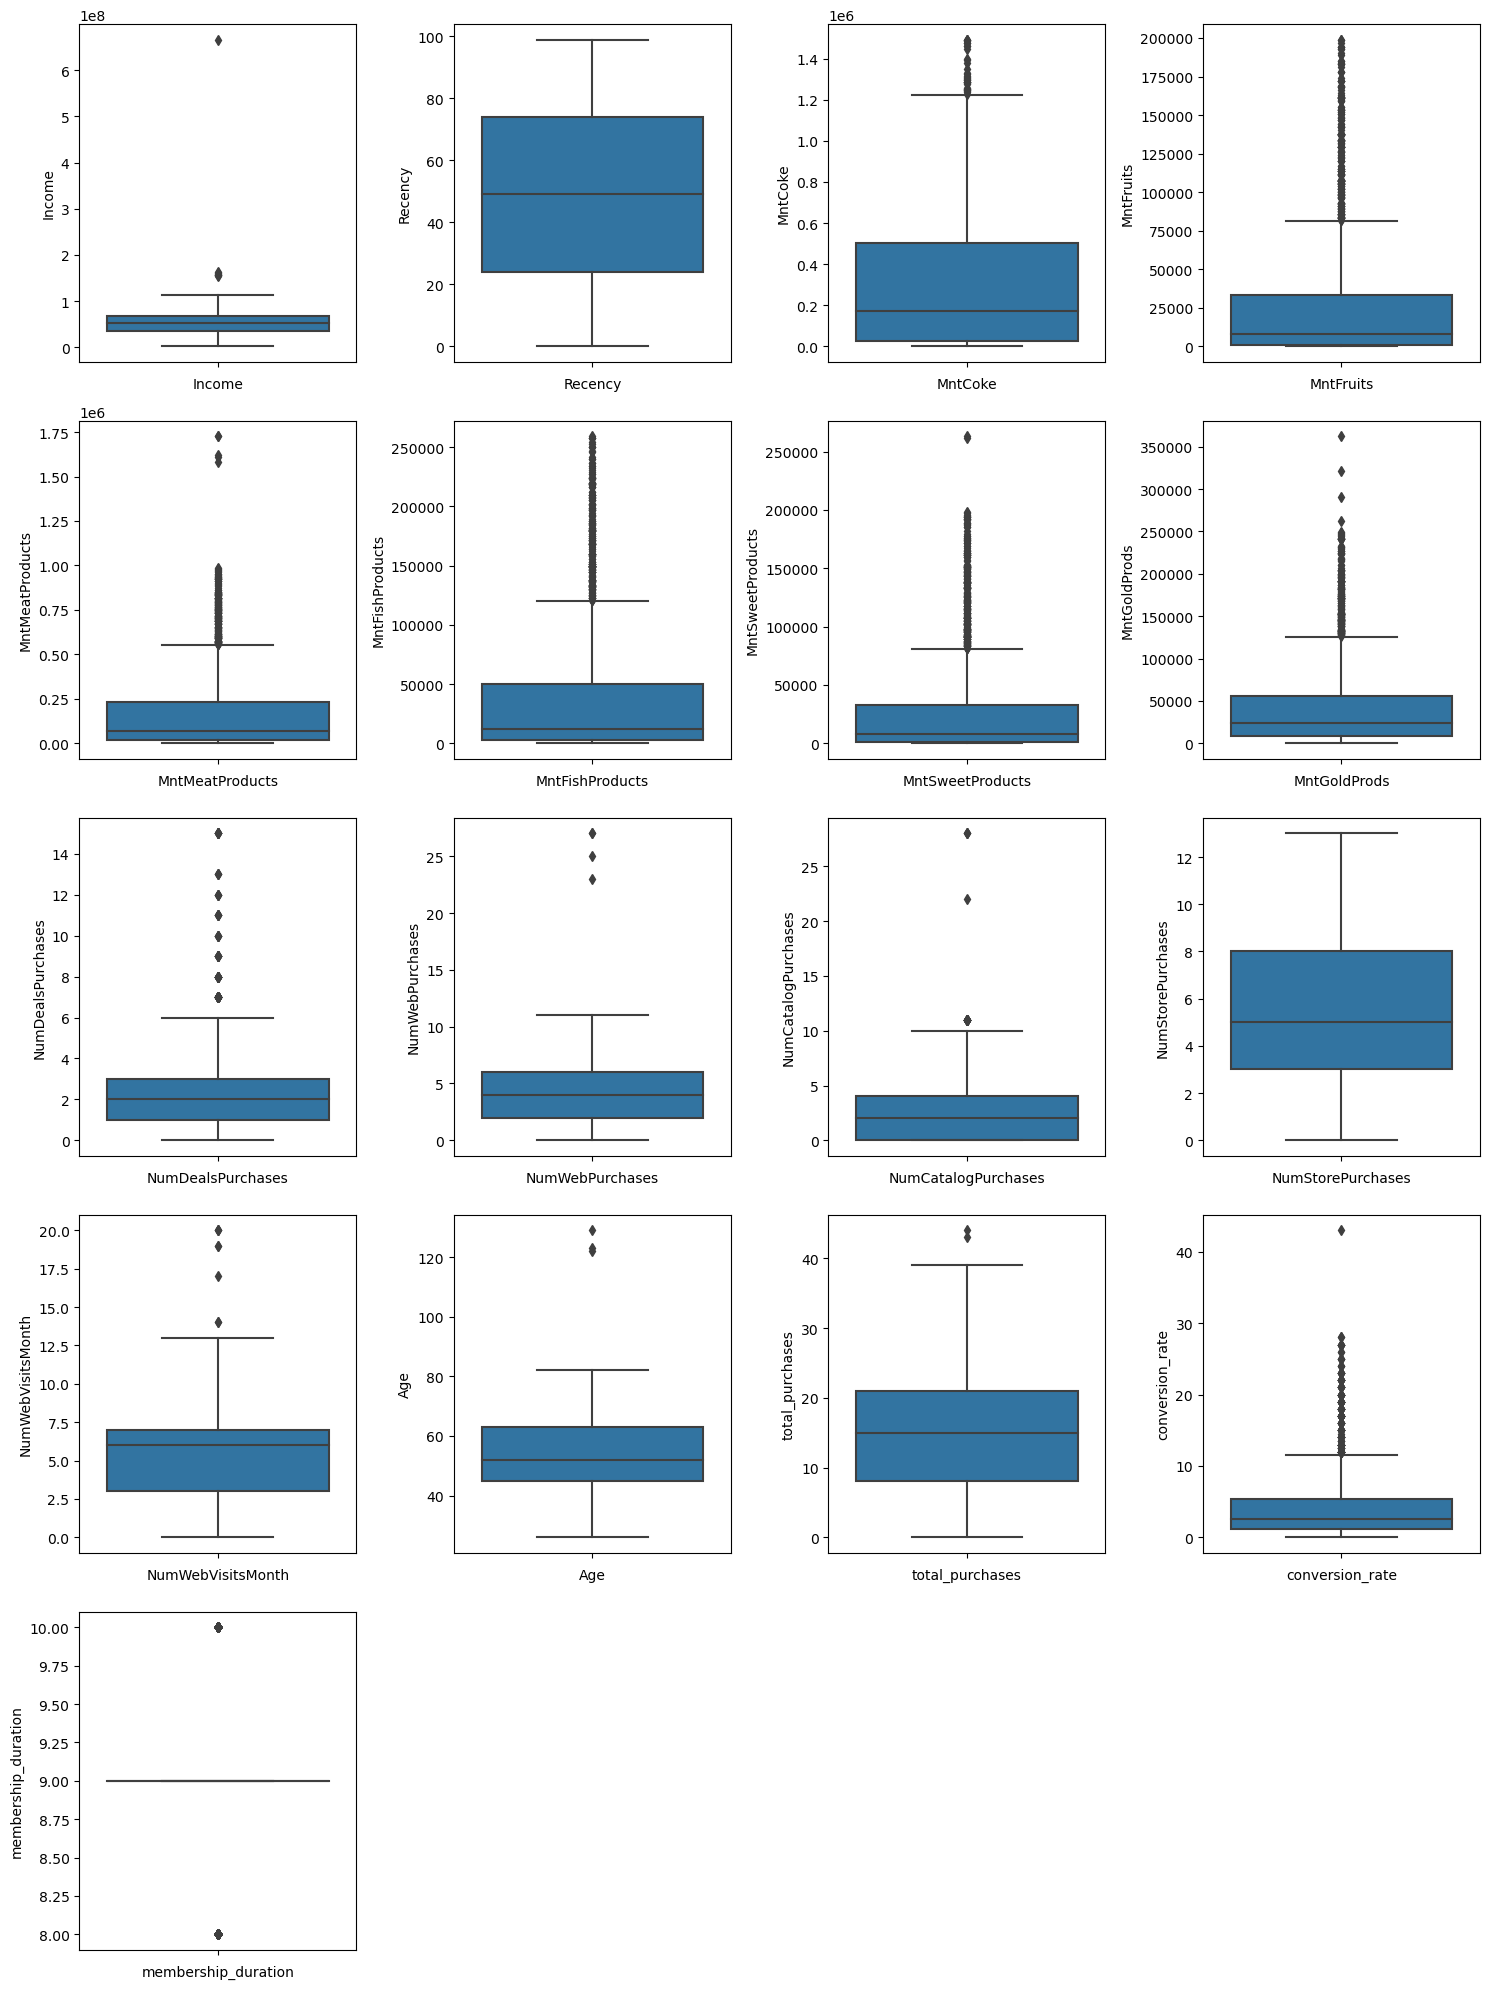

In [48]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.figure(figsize=(15, 20))
for i, col in enumerate(nums):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df_eda[col])
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Categorical

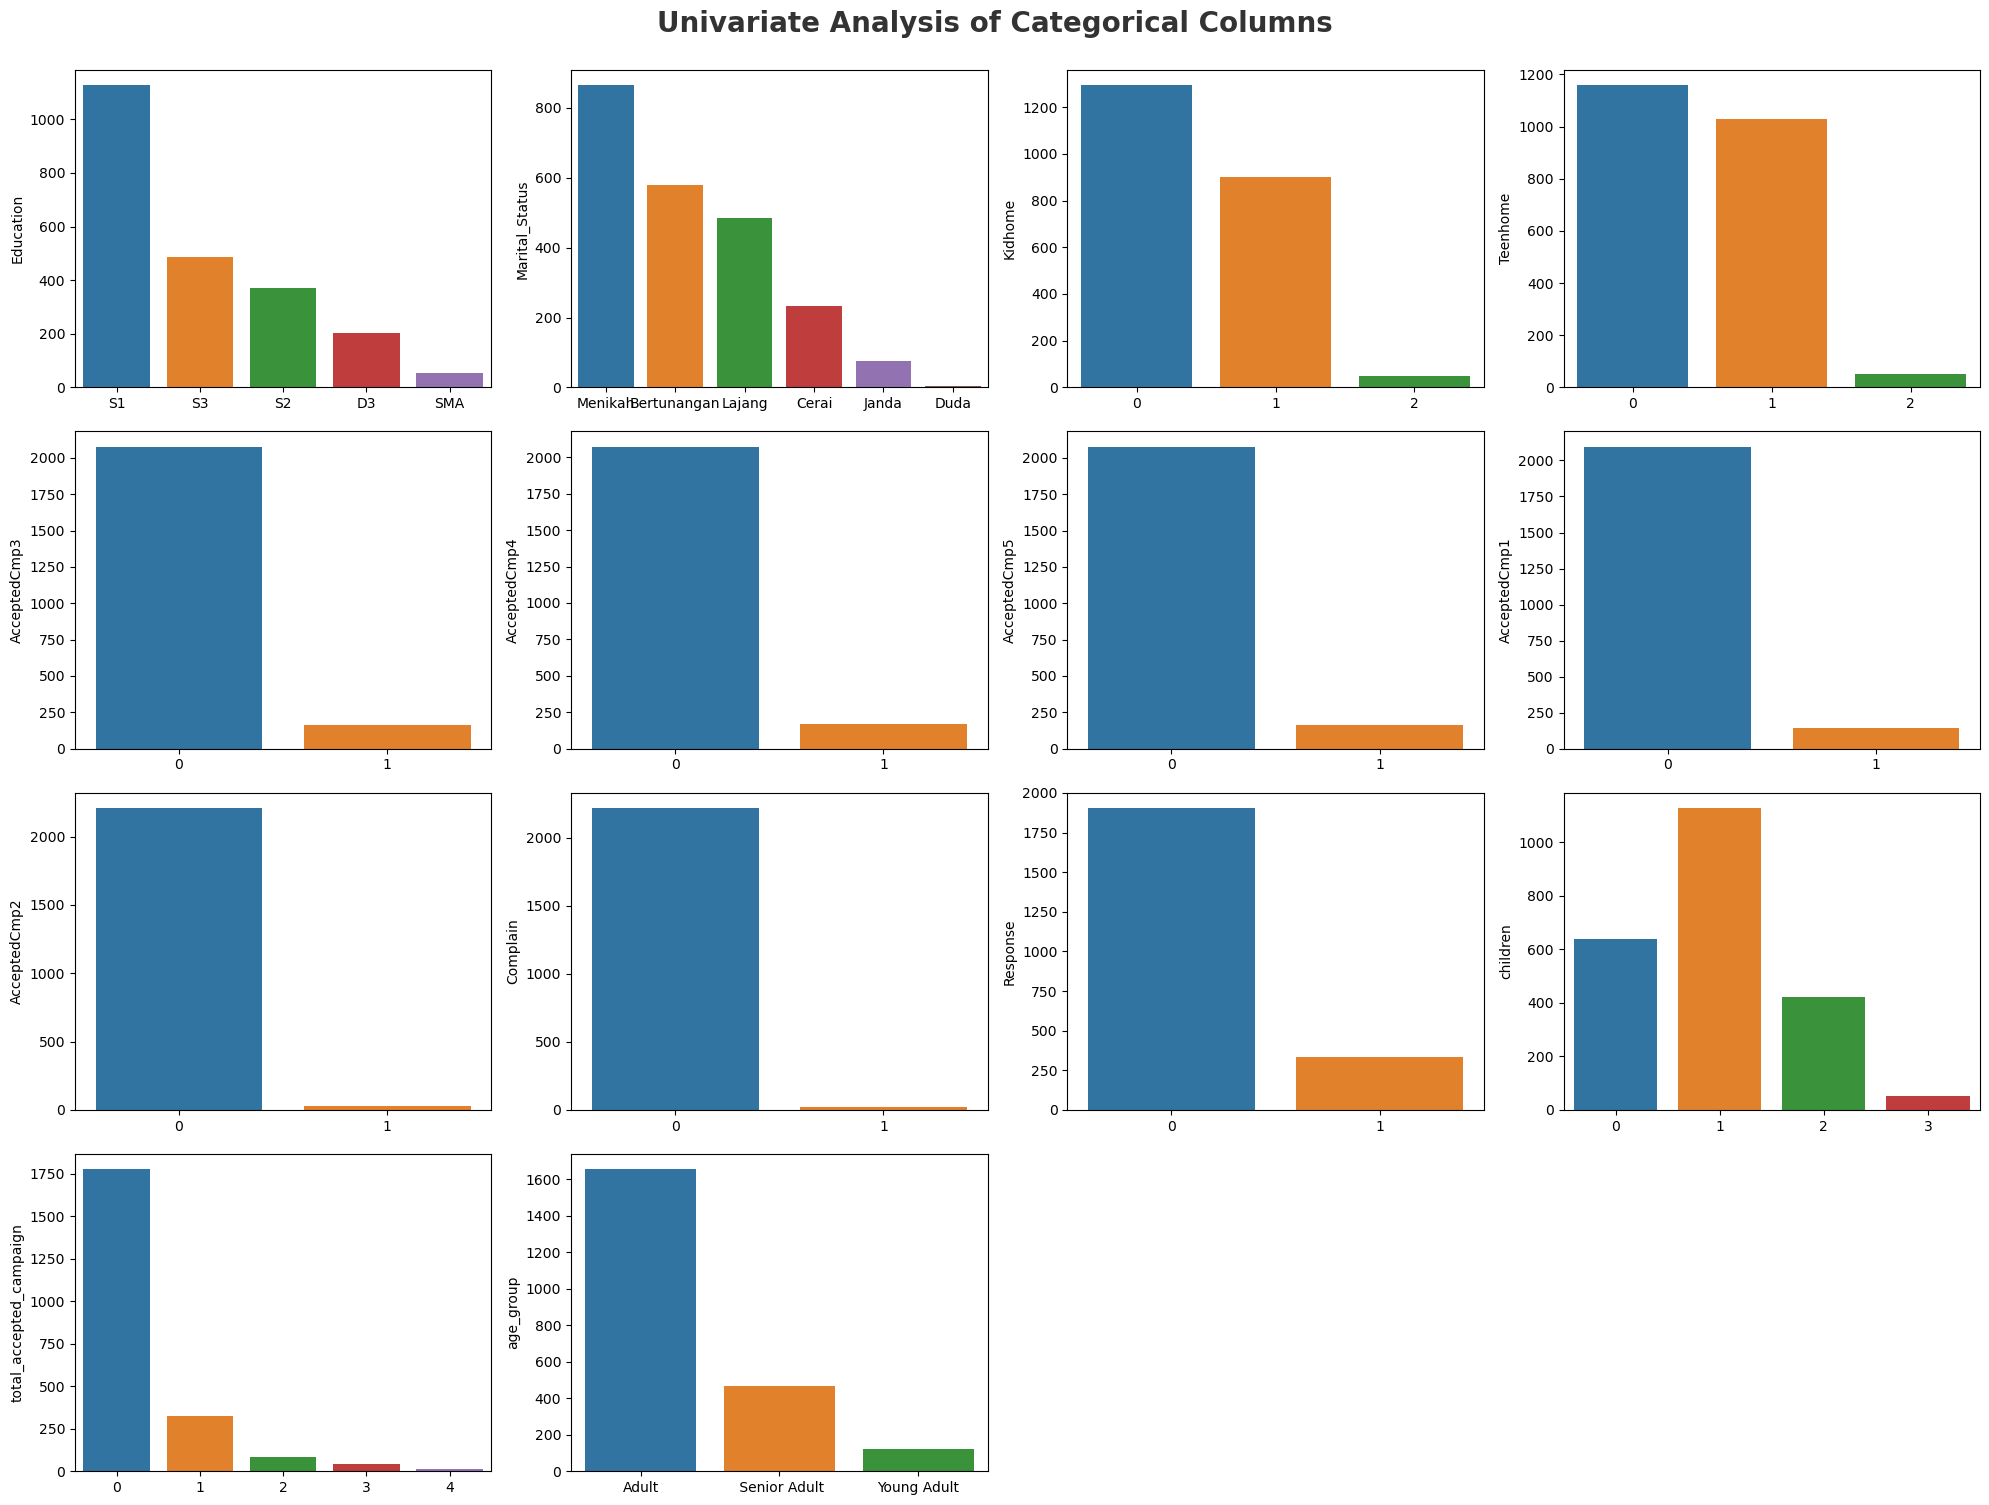

In [49]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cats)):
    plt.subplot(4, 4, i+1)
    sns.barplot(x=df_eda[cats[i]].value_counts().index, y=df_eda[cats[i]].value_counts())

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [50]:
# conversion rate dan age group

cvr_agr = df_eda.groupby(['age_group']).agg({'conversion_rate':'sum'}).reset_index()
cvr_agr['cvr_sum'] = cvr_agr['conversion_rate'].sum()
cvr_agr['percentage'] = round((cvr_agr['conversion_rate']/cvr_agr['cvr_sum'])*100,2)
cvr_agr

,age_group,conversion_rate,cvr_sum,percentage
0,Senior Adult,2518.063889,9845.297974,25.58
1,Adult,6674.321345,9845.297974,67.79
2,Young Adult,652.912740,9845.297974,6.63


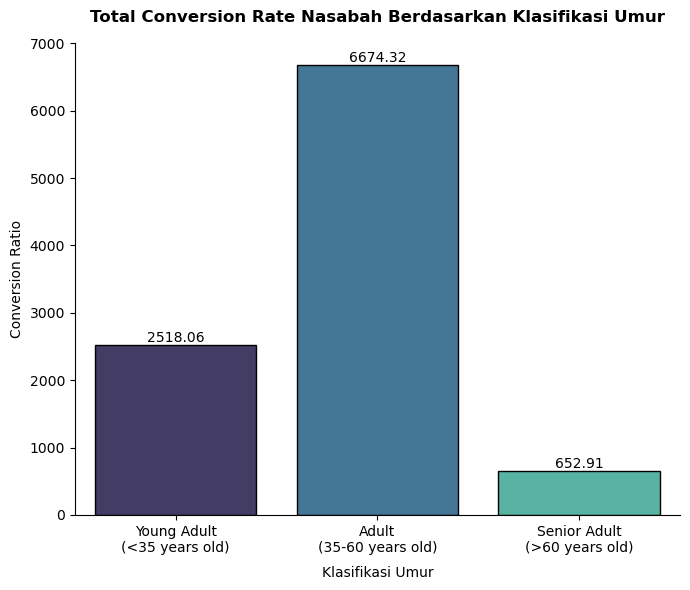

In [51]:
fig, ax = plt.subplots(figsize=(7, 6))
plt.title("Total Conversion Rate Nasabah Berdasarkan Klasifikasi Umur", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='age_group', y='conversion_rate', data=cvr_agr, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Klasifikasi Umur', labelpad=8)
plt.xticks(np.arange(3), ['Young Adult\n(<35 years old)', 'Adult\n(35-60 years old)', 'Senior Adult\n(>60 years old)'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

sns.despine()
plt.tight_layout()
plt.show()

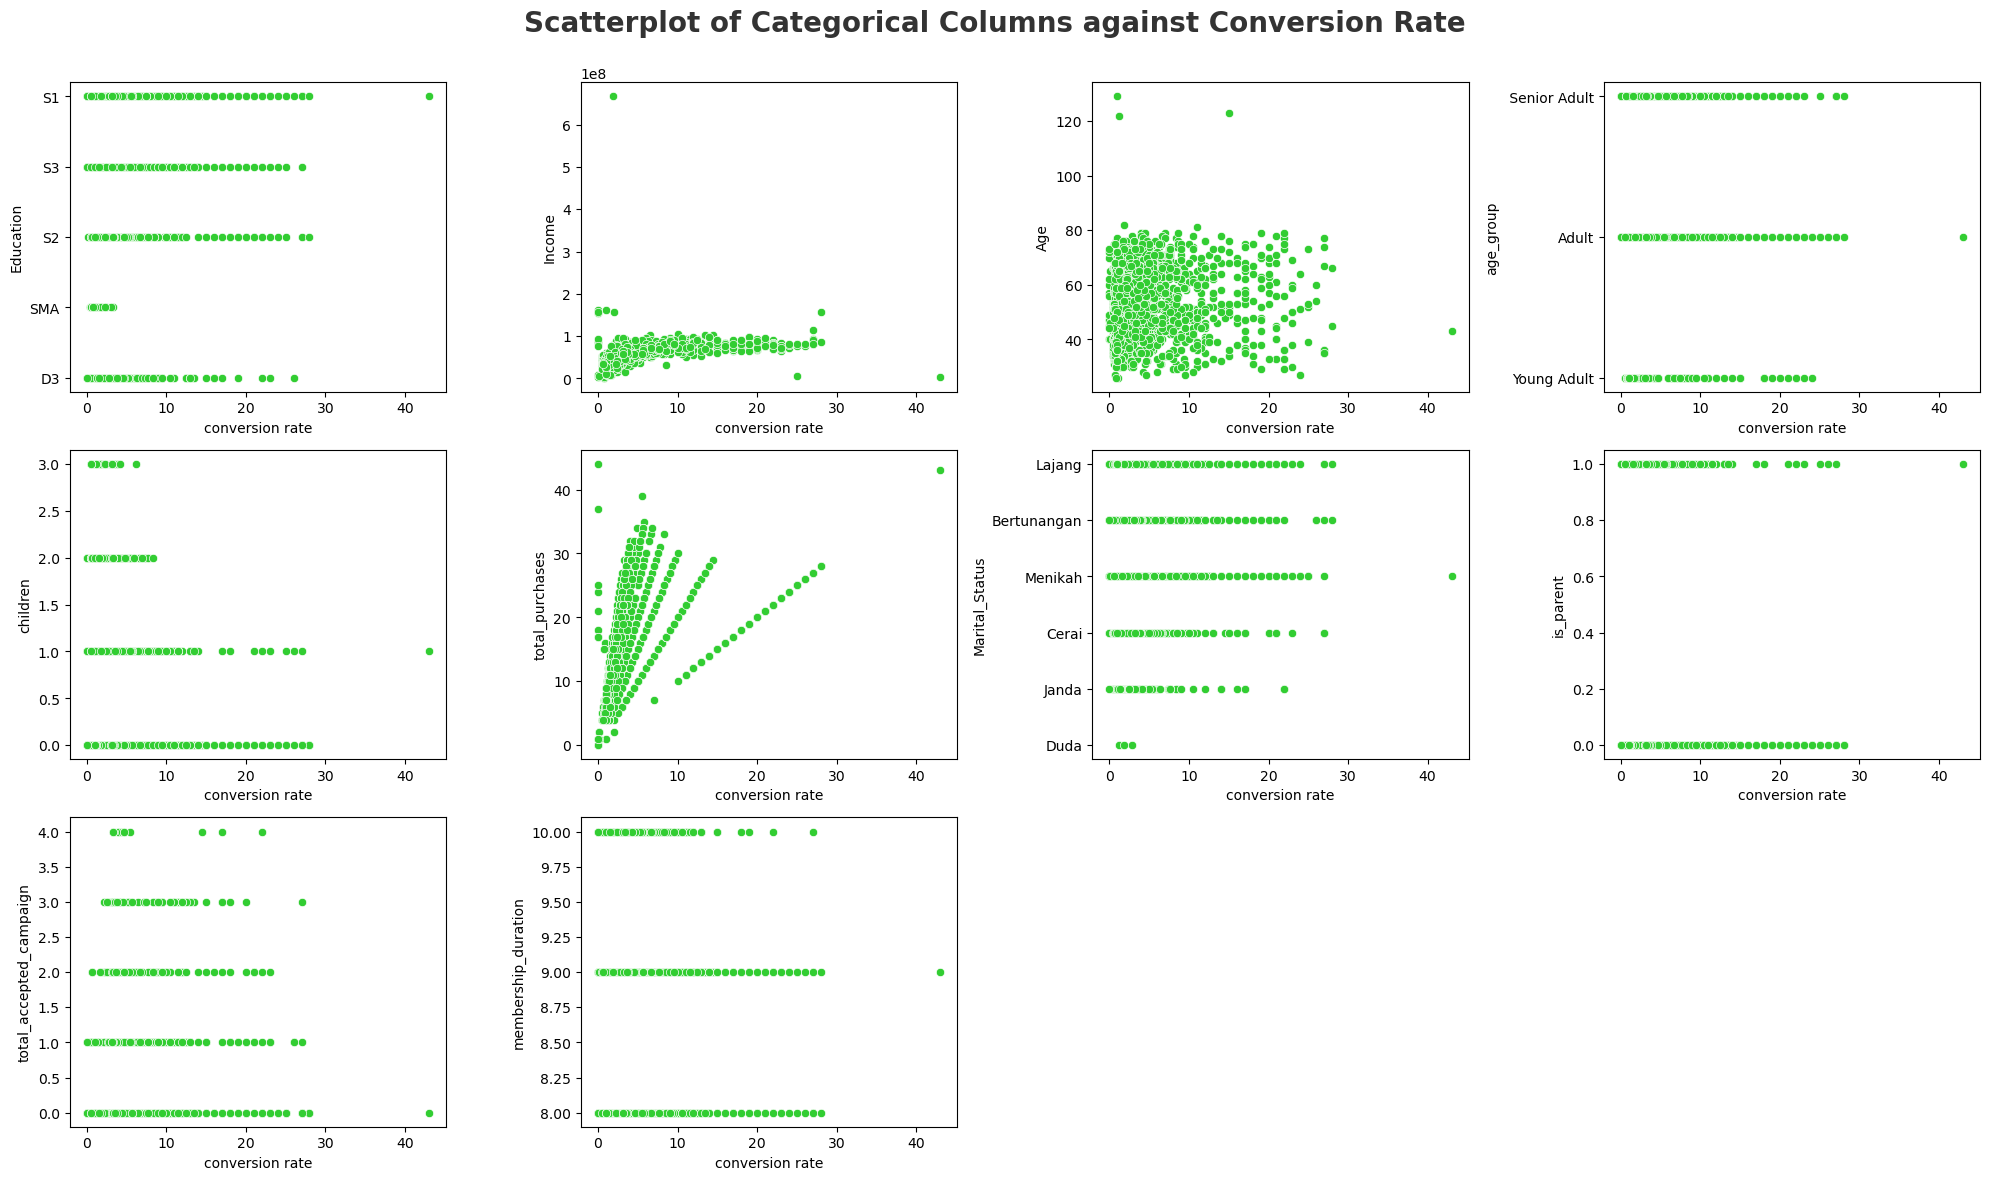

In [57]:
cat=['Education','Income', 'Age', 'age_group', 'children', 'total_purchases', 'Marital_Status', 'is_parent', 'total_accepted_campaign','membership_duration']

plt.figure(figsize=(20, 15))
plt.suptitle('Scatterplot of Categorical Columns against Conversion Rate', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat)):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=df_eda['conversion_rate'], y=df_eda[cat[i]], color='limegreen')
    plt.xlabel('conversion rate')

plt.tight_layout()
plt.show()

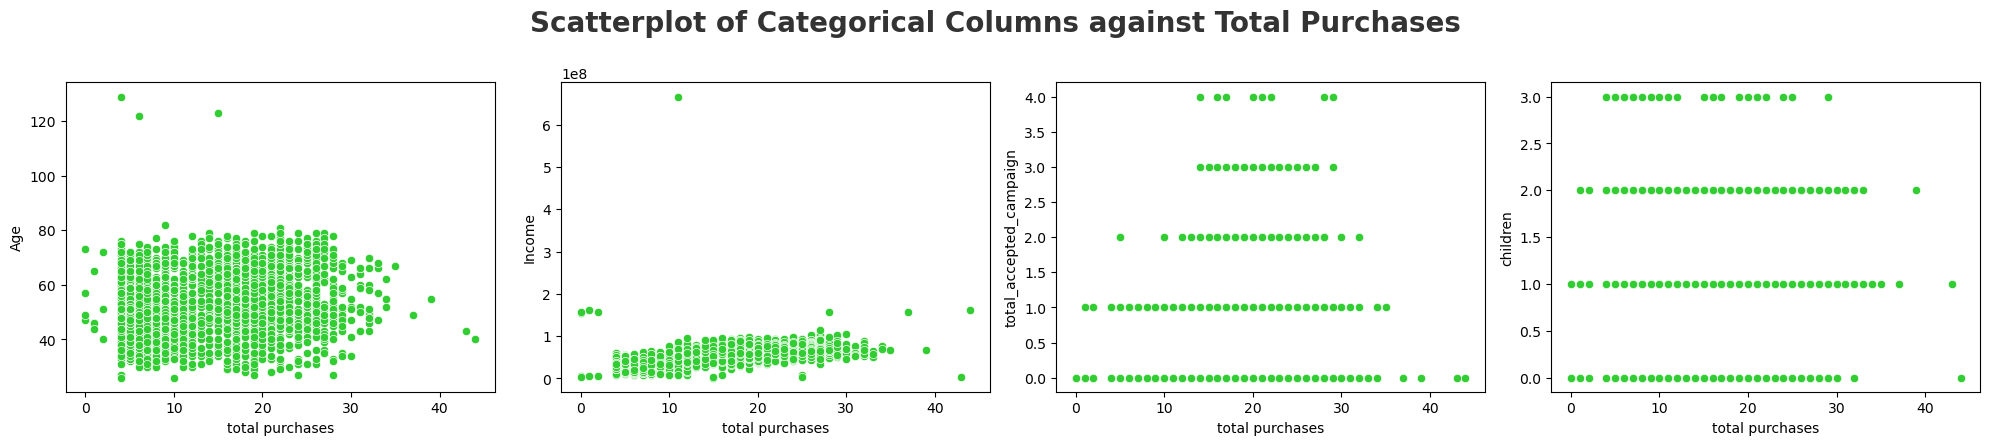

In [58]:
cat2=['Age', 'Income', 'total_accepted_campaign', 'children']

plt.figure(figsize=(20, 15))
plt.suptitle('Scatterplot of Categorical Columns against Total Purchases', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat2)):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=df_eda['total_purchases'], y=df_eda[cat2[i]], color='limegreen')
    plt.xlabel('total purchases')

plt.tight_layout()
plt.show()

## Multivariate Analysis

<Axes: >

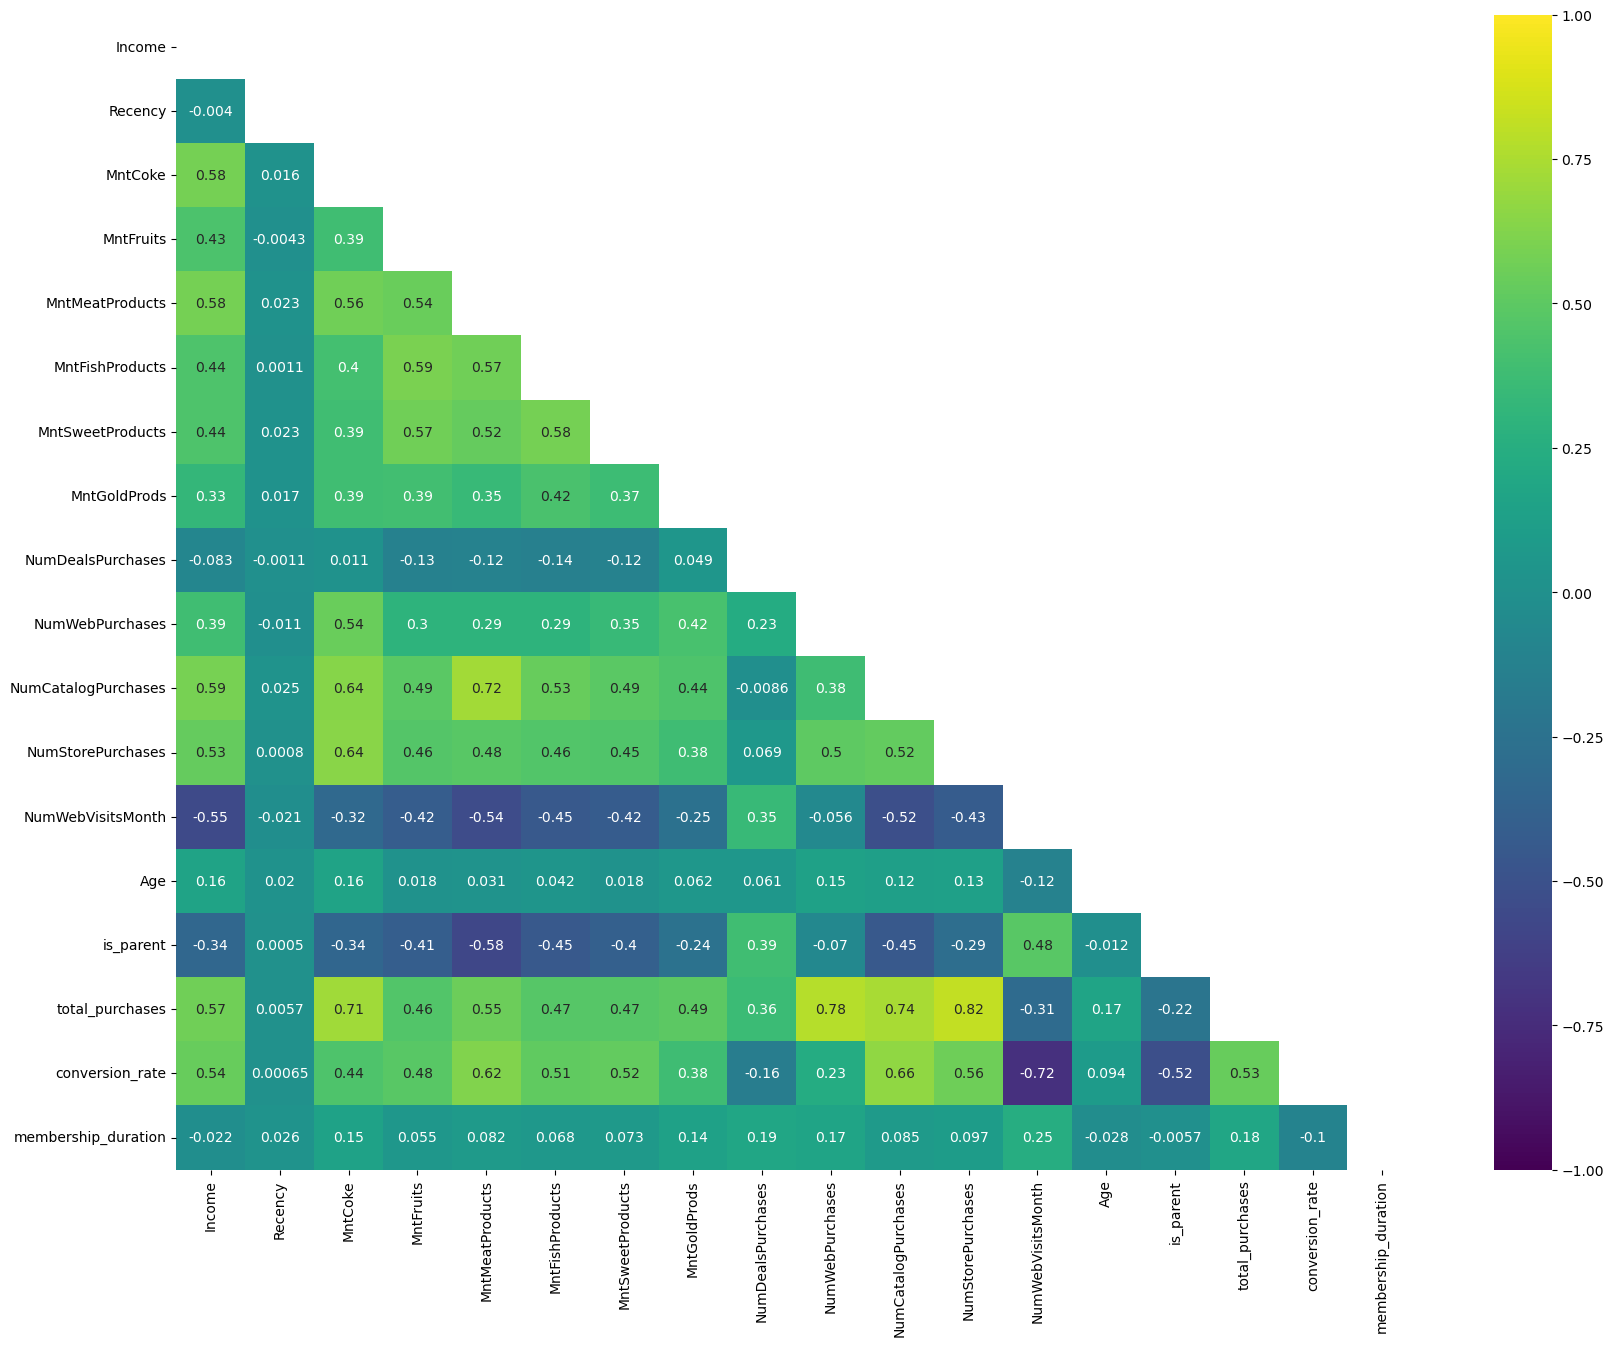

In [59]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df_eda.corr(), dtype=bool))
sns.heatmap(df_eda.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')